# 1. Pandas and Matplotlib

In [32]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

dir_path = os.getcwd()
print(dir_path)

/home/jovyan/alu/ipython


>PS. It is important to use <<%matplotlib inline>> to automatically display matplotlib in this notebook

## DataFrame
DataFrame is a 2-dimension data structure. You can define index (row) and columns name 

In [2]:
# nofi.csv is gottenn from oslobors
#date_parser = lambda x: pd.datetime.strptime(x, '%d.%m.%y')
#df = pd.read_csv('../data/nofi.csv', delimiter=';', header=0, parse_dates=['Date'], date_parser=date_parser)
df = pd.read_csv('../data/nofi.csv', delimiter=';', header=0)
df.shape
# original data
df.head(5)

,Date,Siste,Kjøper,Selger,Høy,Lav,Totalt omsatt (NOK),Totalt antall aksjer omsatt,Antall off. handler,Antall handler totalt,VWAP
0,12.02.18,"85,75","85,75","85,80","86,60","84,45",29031972,339278,1275,1275,"85,5699"
1,09.02.18,"83,60","83,60","83,65","84,20","82,00",36852373,443568,2005,2005,"83,0817"
2,08.02.18,"84,50","84,50","84,55","87,20","84,30",58758800,689464,2303,2307,"85,1523"
3,07.02.18,"83,00","82,90","83,00","84,45","81,95",54233449,656517,2299,2300,"82,6078"
4,06.02.18,"82,35","82,35","82,70","83,60","80,05",68114947,827042,2586,2600,"82,3731"


In [3]:
df.shape

(421, 11)

In [4]:
# not work: rep = lambda x: x.replace(',', '.')
def rep2(x):
    return [float(i.replace(',', '.')) for i in x]
def rep3(x):
    return [i.replace(',', '.') for i in x]
def c_date(x):
    return [pd.datetime.strptime(i, '%d.%m.%y') for i in x]
df[['Siste', 'Kjøper', 'Selger','Høy', 'Lav', 'VWAP']] = \
    df[['Siste', 'Kjøper', 'Selger','Høy', 'Lav', 'VWAP']].apply(rep2)
#df[['Siste', 'Kjøper', 'Selger','Høy', 'Lav', 'VWAP']] = df[['Siste', 'Kjøper', 'Selger','Høy', 'Lav', 'VWAP']].apply(rep3).astype(float)
df[['Date']] = df[['Date']].apply(c_date)
df.head(10)

,Date,Siste,Kjøper,Selger,Høy,Lav,Totalt omsatt (NOK),Totalt antall aksjer omsatt,Antall off. handler,Antall handler totalt,VWAP
0,2018-02-12,85.75,85.75,85.80,86.60,84.45,29031972,339278,1275,1275,85.5699
1,2018-02-09,83.60,83.60,83.65,84.20,82.00,36852373,443568,2005,2005,83.0817
2,2018-02-08,84.50,84.50,84.55,87.20,84.30,58758800,689464,2303,2307,85.1523
3,2018-02-07,83.00,82.90,83.00,84.45,81.95,54233449,656517,2299,2300,82.6078
4,2018-02-06,82.35,82.35,82.70,83.60,80.05,68114947,827042,2586,2600,82.3731
5,2018-02-05,85.20,85.20,85.25,85.90,83.90,43475741,513736,1916,1926,84.6253
6,2018-02-02,87.05,87.00,87.05,87.45,84.90,40320206,467484,1554,1566,86.2481
7,2018-02-01,87.00,87.00,87.20,89.05,86.40,31181619,355839,1190,1190,87.6284
8,2018-01-31,88.00,87.95,88.00,88.90,86.95,40884321,466237,1508,1508,87.6900
9,2018-01-30,88.10,88.05,88.20,89.10,87.60,39370102,445772,1599,1599,88.3189


##  Series
Series a dataset with one dimension. In DataFrame, each row is a serie

In [5]:
nofi_close = pd.Series(df['Siste'].values, index=df['Date'].values, name='NOFI').sort_index()
nofi_close.head(10)

2016-06-17    78.25
2016-06-20    76.00
2016-06-21    73.25
2016-06-22    74.25
2016-06-23    76.00
2016-06-24    74.00
2016-06-27    69.75
2016-06-28    70.00
2016-06-29    75.00
2016-06-30    77.00
Name: NOFI, dtype: float64

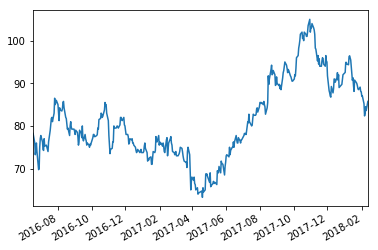

In [6]:
nofi_close.plot()
# must use plt.show() to display the graph. 
# Why??? Abu project dont need to do it. Answer: Using <<%matplotlib inline>> at the top

## Dataframe and Series methods 实例
### 1. Resample()

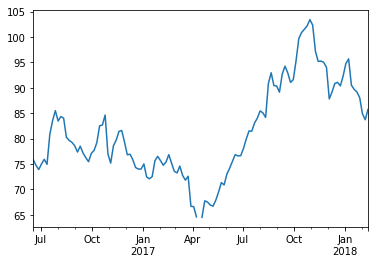

In [7]:
df_5 = nofi_close.resample('5D').mean()
df_5.plot()

### 2. info()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cbfda81d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f4cbc2dd4e0>], dtype=object)

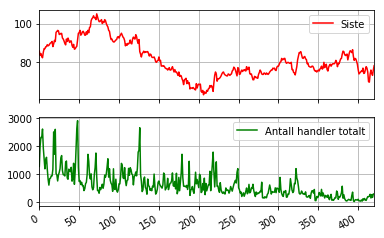

In [8]:
df[['Siste', 'Antall handler totalt']].plot(subplots=True, style=['r', 'g'], grid=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 11 columns):
Date                           421 non-null datetime64[ns]
Siste                          421 non-null float64
Kjøper                         421 non-null float64
Selger                         421 non-null float64
Høy                            421 non-null float64
Lav                            421 non-null float64
Totalt omsatt (NOK)            421 non-null int64
Totalt antall aksjer omsatt    421 non-null int64
Antall off. handler            421 non-null int64
Antall handler totalt          421 non-null int64
VWAP                           421 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 36.3 KB


### 3. describe()

In [10]:
nofi_close.describe()

count    421.000000
mean      81.401069
std        9.294373
min       63.250000
25%       75.000000
50%       79.250000
75%       88.750000
max      105.000000
Name: NOFI, dtype: float64

### 4. PCT_CHANGE()

In [11]:
changeRatio = nofi_close.pct_change()
changeRatio.head()

2016-06-17         NaN
2016-06-20   -0.028754
2016-06-21   -0.036184
2016-06-22    0.013652
2016-06-23    0.023569
Name: NOFI, dtype: float64

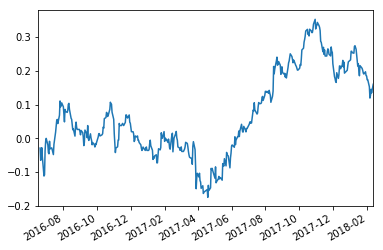

In [12]:
changeRatio.cumsum().plot()

In [13]:
df.columns.values[1:]

array(['Siste', 'Kjøper', 'Selger', 'Høy', 'Lav', 'Totalt omsatt (NOK)',
       'Totalt antall aksjer omsatt', 'Antall off. handler',
       'Antall handler totalt', 'VWAP'], dtype=object)

### 5. Adding new  Columns in Dataframe 
增加了2列数据
- ChangeRatio: 增幅/跌幅
- Amplitude: 当日振幅

In [14]:
df1 = pd.DataFrame(df.iloc[:, 1:].values, index=df['Date'], columns=df.columns.values[1:]).sort_index()
df1 = df1.assign(ChangeRatio=df1['Siste'].pct_change()*100);df1.head()

,Siste,Kjøper,Selger,Høy,Lav,Totalt omsatt (NOK),Totalt antall aksjer omsatt,Antall off. handler,Antall handler totalt,VWAP,ChangeRatio
Date,,,,,,,,,,,
2016-06-17,78.25,78.0,78.25,81.75,78.00,24085600.0,304245.0,290.0,291.0,79.1996,NaN
2016-06-20,76.00,75.5,76.00,80.00,74.00,14851919.0,195743.0,301.0,303.0,75.9285,-2.875399
2016-06-21,73.25,73.0,73.25,76.25,73.00,110305931.0,1454924.0,173.0,178.0,74.0870,-3.618421
2016-06-22,74.25,74.0,74.25,74.75,70.25,13169859.0,180868.0,274.0,276.0,72.6359,1.365188
2016-06-23,76.00,76.0,76.75,78.75,74.75,6791251.0,88606.0,156.0,157.0,76.6207,2.356902


In [15]:
df1 = df1.assign(Amplitude = (df1['Høy']-df1['Lav'])/df1['Siste'].shift(1)*100);df1.head()

,Siste,Kjøper,Selger,Høy,Lav,Totalt omsatt (NOK),Totalt antall aksjer omsatt,Antall off. handler,Antall handler totalt,VWAP,ChangeRatio,Amplitude
Date,,,,,,,,,,,,
2016-06-17,78.25,78.0,78.25,81.75,78.00,24085600.0,304245.0,290.0,291.0,79.1996,NaN,NaN
2016-06-20,76.00,75.5,76.00,80.00,74.00,14851919.0,195743.0,301.0,303.0,75.9285,-2.875399,7.667732
2016-06-21,73.25,73.0,73.25,76.25,73.00,110305931.0,1454924.0,173.0,178.0,74.0870,-3.618421,4.276316
2016-06-22,74.25,74.0,74.25,74.75,70.25,13169859.0,180868.0,274.0,276.0,72.6359,1.365188,6.143345
2016-06-23,76.00,76.0,76.75,78.75,74.75,6791251.0,88606.0,156.0,157.0,76.6207,2.356902,5.387205


### 6. Handle 'nan' value (see P85)
Functions: fillna, dropna

In [16]:
df1.fillna(0, inplace=False);df1.head()

,Siste,Kjøper,Selger,Høy,Lav,Totalt omsatt (NOK),Totalt antall aksjer omsatt,Antall off. handler,Antall handler totalt,VWAP,ChangeRatio,Amplitude
Date,,,,,,,,,,,,
2016-06-17,78.25,78.0,78.25,81.75,78.00,24085600.0,304245.0,290.0,291.0,79.1996,NaN,NaN
2016-06-20,76.00,75.5,76.00,80.00,74.00,14851919.0,195743.0,301.0,303.0,75.9285,-2.875399,7.667732
2016-06-21,73.25,73.0,73.25,76.25,73.00,110305931.0,1454924.0,173.0,178.0,74.0870,-3.618421,4.276316
2016-06-22,74.25,74.0,74.25,74.75,70.25,13169859.0,180868.0,274.0,276.0,72.6359,1.365188,6.143345
2016-06-23,76.00,76.0,76.75,78.75,74.75,6791251.0,88606.0,156.0,157.0,76.6207,2.356902,5.387205


### 7. DataFrame conditional selection and sorting

In [17]:
df1.sort_values(by='Amplitude', ascending=False)[:5]

,Siste,Kjøper,Selger,Høy,Lav,Totalt omsatt (NOK),Totalt antall aksjer omsatt,Antall off. handler,Antall handler totalt,VWAP,ChangeRatio,Amplitude
Date,,,,,,,,,,,,
2017-05-02,66.75,66.75,67.0,70.00,60.00,28090437.0,415173.0,810.0,813.0,67.6591,-2.197802,14.652015
2016-06-24,74.00,73.25,74.0,75.00,65.00,24863310.0,338728.0,286.0,289.0,72.5847,-2.631579,13.157895
2016-06-29,75.00,74.75,75.0,78.25,70.25,12045289.0,158350.0,204.0,205.0,76.0545,7.142857,11.428571
2016-11-09,76.25,75.75,76.5,78.50,70.50,34387961.0,451658.0,432.0,438.0,75.3959,0.000000,10.491803
2016-06-20,76.00,75.50,76.0,80.00,74.00,14851919.0,195743.0,301.0,303.0,75.9285,-2.875399,7.667732


In [18]:
df1.sort_values(by='ChangeRatio', ascending=True)[1:10]

,Siste,Kjøper,Selger,Høy,Lav,Totalt omsatt (NOK),Totalt antall aksjer omsatt,Antall off. handler,Antall handler totalt,VWAP,ChangeRatio,Amplitude
Date,,,,,,,,,,,,
2016-06-27,69.75,69.75,70.00,73.00,69.50,20820653.0,296371.0,224.0,226.0,70.4756,-5.743243,4.729730
2017-02-15,73.00,72.75,73.00,77.75,72.75,125880575.0,1649943.0,1058.0,1065.0,75.0662,-5.501618,6.472492
2017-03-28,69.50,69.25,69.50,74.50,69.00,76032253.0,1069666.0,1078.0,1082.0,71.0673,-5.119454,7.508532
2018-01-15,90.70,90.70,90.75,95.40,90.20,107649273.0,1172854.0,2582.0,2589.0,91.7846,-4.976427,5.447878
2017-05-04,65.75,65.75,66.75,71.00,65.75,54151332.0,796846.0,1067.0,1071.0,67.9223,-4.710145,7.608696
2016-11-01,77.75,77.50,77.75,80.00,76.00,40956566.0,526242.0,865.0,867.0,77.8239,-4.307692,4.923077
2017-12-04,88.25,88.25,88.50,92.75,87.50,144302055.0,1599091.0,2593.0,2598.0,90.1054,-3.814714,5.722071
2016-09-15,77.00,76.25,77.00,79.50,76.75,163765868.0,2177205.0,334.0,335.0,77.6833,-3.750000,3.437500
2016-06-21,73.25,73.00,73.25,76.25,73.00,110305931.0,1454924.0,173.0,178.0,74.0870,-3.618421,4.276316


In [19]:
df1[df1.ChangeRatio>0].sort_values(by='Amplitude')[:5]

,Siste,Kjøper,Selger,Høy,Lav,Totalt omsatt (NOK),Totalt antall aksjer omsatt,Antall off. handler,Antall handler totalt,VWAP,ChangeRatio,Amplitude
Date,,,,,,,,,,,,
2016-12-29,74.50,74.25,74.50,74.75,74.25,2994825.0,40228.0,152.0,152.0,74.4463,0.336700,0.673401
2017-03-02,74.00,73.75,74.00,74.00,73.50,14125328.0,191332.0,430.0,432.0,73.7648,0.338983,0.677966
2016-12-22,74.00,73.50,74.00,74.00,73.50,10482541.0,141876.0,283.0,284.0,73.8607,0.338983,0.677966
2017-09-13,93.00,92.75,93.00,93.00,92.25,25881606.0,278695.0,875.0,875.0,92.8671,0.540541,0.810811
2016-08-11,85.75,85.25,85.75,86.00,85.25,32688193.0,381488.0,145.0,150.0,85.7742,0.292398,0.877193


### 8.  寻找异常涨幅

In [20]:
nofi = df1.copy();nofi.head()

,Siste,Kjøper,Selger,Høy,Lav,Totalt omsatt (NOK),Totalt antall aksjer omsatt,Antall off. handler,Antall handler totalt,VWAP,ChangeRatio,Amplitude
Date,,,,,,,,,,,,
2016-06-17,78.25,78.0,78.25,81.75,78.00,24085600.0,304245.0,290.0,291.0,79.1996,NaN,NaN
2016-06-20,76.00,75.5,76.00,80.00,74.00,14851919.0,195743.0,301.0,303.0,75.9285,-2.875399,7.667732
2016-06-21,73.25,73.0,73.25,76.25,73.00,110305931.0,1454924.0,173.0,178.0,74.0870,-3.618421,4.276316
2016-06-22,74.25,74.0,74.25,74.75,70.25,13169859.0,180868.0,274.0,276.0,72.6359,1.365188,6.143345
2016-06-23,76.00,76.0,76.75,78.75,74.75,6791251.0,88606.0,156.0,157.0,76.6207,2.356902,5.387205


421


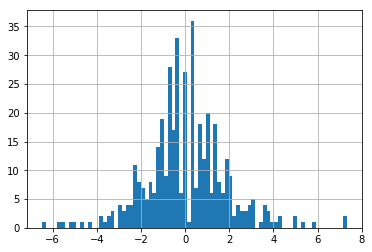

In [21]:
print(nofi.ChangeRatio.size)
nofi.ChangeRatio.hist(bins=80)

根据上图和下边的分类（Divide the data into 10 potions）. (2.883, 7.31] 可以认为是异常

In [22]:
cats = pd.qcut(np.abs(nofi.ChangeRatio), 10)
cats.value_counts()

(1.297, 1.645]    43
(0.739, 0.993]    43
(0.292, 0.338]    43
(2.883, 7.31]     42
(2.113, 2.883]    42
(0.599, 0.739]    42
[0, 0.292]        42
(1.645, 2.113]    41
(0.993, 1.297]    41
(0.338, 0.599]    41
Name: ChangeRatio, dtype: int64

nofi.Amplitude.hist(bins=80)

In [23]:
cats = pd.qcut(np.abs(nofi.Amplitude), 10)
cats.value_counts()

(1.657, 1.948]     43
(4.312, 14.652]    42
(3.457, 4.312]     42
(2.888, 3.457]     42
(2.468, 2.888]     42
(2.207, 2.468]     42
(1.452, 1.657]     42
(1.223, 1.452]     42
[0.312, 1.223]     42
(1.948, 2.207]     41
Name: Amplitude, dtype: int64

(4.312, 14.652] 对振幅来说就是异常

### 9. 星期几是好日子
添加2列数据
- positive: 0 下跌； 1 上涨
- weekday: 1 周一； 5 周五

使用crosstable显示统计结果

In [24]:
nofi['positive'] = np.where(nofi.ChangeRatio > 0, 1, 0);
#nofi['weekday'] = pd.Series(pd.to_datetime(nofi.index)).dt.dayofweek;nofi.head()
nofi['weekday'] = pd.to_datetime(nofi.index).dayofweek+1; nofi.head()


,Siste,Kjøper,Selger,Høy,Lav,Totalt omsatt (NOK),Totalt antall aksjer omsatt,Antall off. handler,Antall handler totalt,VWAP,ChangeRatio,Amplitude,positive,weekday
Date,,,,,,,,,,,,,,
2016-06-17,78.25,78.0,78.25,81.75,78.00,24085600.0,304245.0,290.0,291.0,79.1996,NaN,NaN,0,5
2016-06-20,76.00,75.5,76.00,80.00,74.00,14851919.0,195743.0,301.0,303.0,75.9285,-2.875399,7.667732,0,1
2016-06-21,73.25,73.0,73.25,76.25,73.00,110305931.0,1454924.0,173.0,178.0,74.0870,-3.618421,4.276316,0,2
2016-06-22,74.25,74.0,74.25,74.75,70.25,13169859.0,180868.0,274.0,276.0,72.6359,1.365188,6.143345,1,3
2016-06-23,76.00,76.0,76.75,78.75,74.75,6791251.0,88606.0,156.0,157.0,76.6207,2.356902,5.387205,1,4


In [25]:
xt = pd.crosstab(nofi.weekday, nofi.positive);xt

positive,0,1
weekday,,
1,48,33
2,40,45
3,48,37
4,46,38
5,46,40


In [26]:
xt_pct = xt.div(xt.sum(1).astype(float), axis=0);xt_pct

positive,0,1
weekday,,
1,0.592593,0.407407
2,0.470588,0.529412
3,0.564706,0.435294
4,0.547619,0.452381
5,0.534884,0.465116


In [27]:
nofi.pivot_table(['positive'], index=['weekday'])

,positive
weekday,
1,0.407407
2,0.529412
3,0.435294
4,0.452381
5,0.465116


### 10. 跳空缺口
添加新的一列 ***jump_power***. 

In [28]:
jump_threshold = nofi.Siste.median() * 0.03
print(f"jump_threshold={jump_threshold}")
nofi['jump_power'] = np.where(np.abs(nofi['Lav'] - nofi['Siste'].shift(1)) > jump_threshold, 
                              (nofi['Lav'] - nofi['Siste'].shift(1))/jump_threshold, np.nan);
nofi.tail()

jump_threshold=2.3775


,Siste,Kjøper,Selger,Høy,Lav,Totalt omsatt (NOK),Totalt antall aksjer omsatt,Antall off. handler,Antall handler totalt,VWAP,ChangeRatio,Amplitude,positive,weekday,jump_power
Date,,,,,,,,,,,,,,,
2018-02-06,82.35,82.35,82.70,83.60,80.05,68114947.0,827042.0,2586.0,2600.0,82.3731,-3.345070,4.166667,0,2,-2.166141
2018-02-07,83.00,82.90,83.00,84.45,81.95,54233449.0,656517.0,2299.0,2300.0,82.6078,0.789314,3.035823,1,3,NaN
2018-02-08,84.50,84.50,84.55,87.20,84.30,58758800.0,689464.0,2303.0,2307.0,85.1523,1.807229,3.493976,1,4,NaN
2018-02-09,83.60,83.60,83.65,84.20,82.00,36852373.0,443568.0,2005.0,2005.0,83.0817,-1.065089,2.603550,0,5,-1.051525
2018-02-12,85.75,85.75,85.80,86.60,84.45,29031972.0,339278.0,1275.0,1275.0,85.5699,2.571770,2.571770,1,1,NaN


In [29]:
jp = nofi[nofi.jump_power.notnull()]; 
print(jp.shape)
jp.sort_values(by='jump_power', ascending=True)[:10]

(55, 15)


,Siste,Kjøper,Selger,Høy,Lav,Totalt omsatt (NOK),Totalt antall aksjer omsatt,Antall off. handler,Antall handler totalt,VWAP,ChangeRatio,Amplitude,positive,weekday,jump_power
Date,,,,,,,,,,,,,,,
2016-06-24,74.00,73.25,74.00,75.00,65.00,24863310.0,338728.0,286.0,289.0,72.5847,-2.631579,13.157895,0,5,-4.626709
2017-05-02,66.75,66.75,67.00,70.00,60.00,28090437.0,415173.0,810.0,813.0,67.6591,-2.197802,14.652015,0,2,-3.470032
2017-10-31,102.00,101.50,102.00,103.00,98.25,179712075.0,1795843.0,1727.0,1750.0,100.7884,-2.857143,4.523810,0,2,-2.839117
2016-11-09,76.25,75.75,76.50,78.50,70.50,34387961.0,451658.0,432.0,438.0,75.3959,0.000000,10.491803,0,3,-2.418507
2016-11-01,77.75,77.50,77.75,80.00,76.00,40956566.0,526242.0,865.0,867.0,77.8239,-4.307692,4.923077,0,2,-2.208202
2017-08-11,82.75,82.75,83.00,84.00,79.25,23492066.0,284780.0,752.0,754.0,82.4916,-2.071006,5.621302,0,5,-2.208202
2018-01-15,90.70,90.70,90.75,95.40,90.20,107649273.0,1172854.0,2582.0,2589.0,91.7846,-4.976427,5.447878,0,1,-2.208202
2018-02-06,82.35,82.35,82.70,83.60,80.05,68114947.0,827042.0,2586.0,2600.0,82.3731,-3.345070,4.166667,0,2,-2.166141
2017-02-15,73.00,72.75,73.00,77.75,72.75,125880575.0,1649943.0,1058.0,1065.0,75.0662,-5.501618,6.472492,0,3,-1.892744


# 2. 可视化工具
这里使用了3个frameworks:
- matplotlib
- bokeh
- seaborn

## 1. matplotlib 蜡烛图的绘制

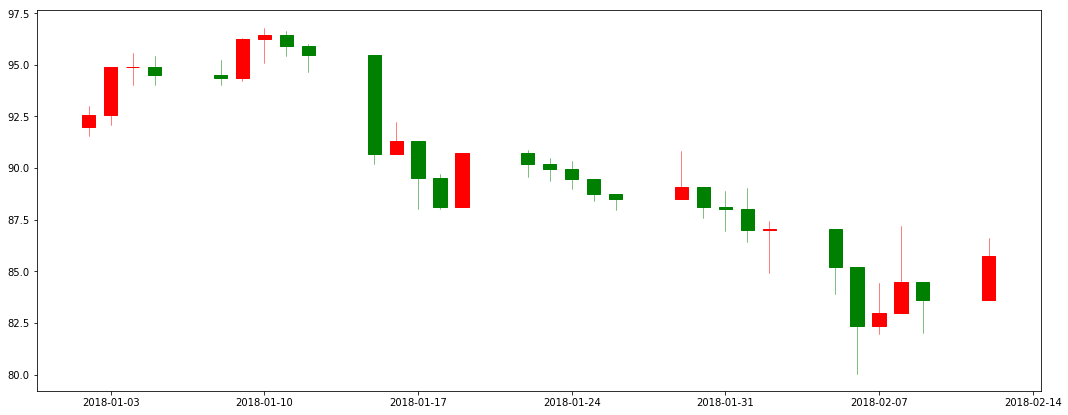

In [33]:
import matplotlib.finance as plt_f

# 创建画布
fig, axes = plt.subplots(figsize=(18,7))

data = nofi.copy()
data['open'] = nofi['Siste'].shift(1)
data = data[-30:]

dochl = []

for i, (d, o, c, h, l) in enumerate(zip(data.index, data.open, data.Siste, data.Høy, data.Lav)):
    d = plt_f.date2num(d)
    dochl.append((d, o, c, h, l))

plt_f.candlestick_ochl(axes, dochl, width=0.6, colorup="red", colordown="green")
axes.autoscale_view()
axes.xaxis_date()

## 2. Bokeh 蜡烛图的绘制
Ref https://github.com/bbfamily/abu/blob/master/abupy/MarketBu/ABuMarketDrawing.py#L194

In [31]:
import bokeh.plotting as bp
from math import pi

def plot_bokeh_candle_dochl(date, p_open, close, high, low, symbol):
    
    bp.output_notebook()

    p = bp.figure(x_axis_type="datetime", plot_width=840, title=symbol)
    p.xaxis.major_label_orientation = pi / 4
    p.grid.grid_line_alpha = 0.3

    w = 24 * 60 * 60 * 1000
    
    mids = (p_open + close) / 2
    spans = abs(close - p_open)

    inc = close > p_open
    dec = p_open > close

    p.segment(date.to_datetime(), high, date.to_datetime(), low, color="black")
    p.rect(date.to_datetime()[inc], mids[inc], w, spans[inc], fill_color='red', line_color='red')
    p.rect(date.to_datetime()[dec], mids[dec], w, spans[dec], fill_color='green', line_color='green')
    bp.show(p)
    

plot_bokeh_candle_dochl(data.index, data['open'].values, data['Siste'].values, 
                        data['Høy'].values, data['Lav'].values, 'NOFI')

Loading BokehJS ...

## 3. Seaborn

In [45]:
import seaborn as sb

nofi['ChangeRatio'].describe()

count    420.000000
mean       0.038161
std        1.813260
min       -6.474820
25%       -0.976007
50%        0.000000
75%        1.002525
max        7.309942
Name: ChangeRatio, dtype: float64

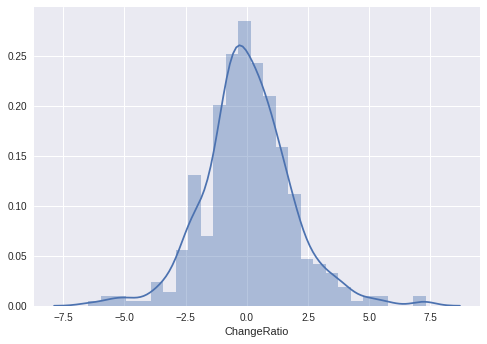

In [50]:
sb.distplot(nofi[1:]['ChangeRatio'])

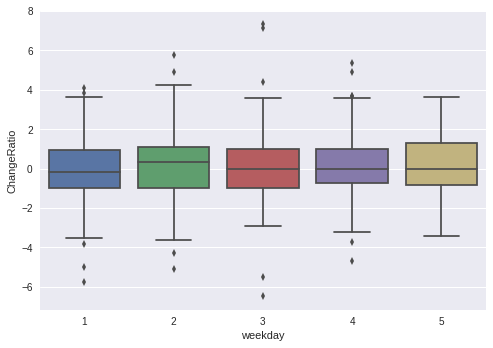

In [51]:
sb.boxplot(x='weekday', y='ChangeRatio', data=nofi)

# 3. 常用数学方法

## 1. 线性回归 (Linear regression)

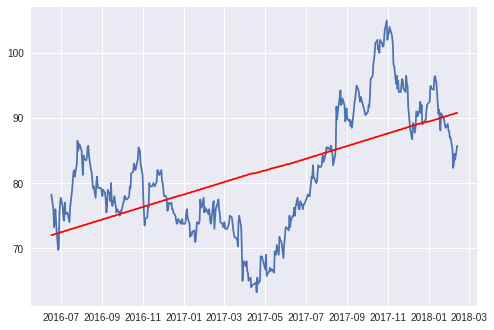

In [96]:
import statsmodels.api as sm
from statsmodels import regression

def liner_regression(y):
    x = np.arange(0, len(y))
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y, x).fit()
    return model

nofi_close = nofi['Siste'];
x = np.arange(0, nofi_close.shape[0])
y = nofi_close.values;
model = liner_regression(nofi_close.values)
b = model.params[0]
k = model.params[1]
y_fit = k * x + b
plt.plot(nofi_close.index, y)
plt.plot(nofi_close.index, y_fit, 'r')
# model.summary()

可以通过MAE（偏差绝对值之和）,MSE（偏差平方之和）,RMSE（偏差平方和开平方）度量y和y_fit的误差. 基本公式如下（也可用sklean framework来计算）

In [97]:
MAE = sum(np.abs(y - y_fit)) / len(y)
MSE = sum(np.square(y - y_fit)) / len(y)
RMSE = np.sqrt(sum(np.square(y - y_fit)) / len(y))
print(f"Basic function:\n  MAE={MAE};MSE={MSE};RMSE={RMSE}")


from sklearn import metrics
sklearn_MAE = metrics.mean_absolute_error(y, y_fit)
sklearn_MSE = metrics.mean_squared_error(y, y_fit)
sklearn_RMSE = np.sqrt(sklearn_MSE)
print(f"Sklearn cacluation:\n  MAE={sklearn_MAE};MSE={sklearn_MSE};RMSE={sklearn_RMSE}")

Basic function:
  MAE=6.082271665861999;MSE=56.74261665610045;RMSE=7.532769520973043
Sklearn cacluation:
  MAE=6.082271665861994;MSE=56.74261665610048;RMSE=7.532769520973045


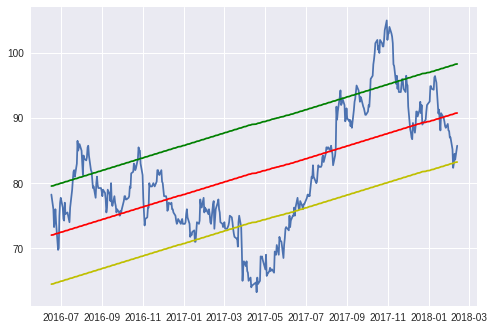

In [115]:
plt.plot(nofi_close.index, y)
plt.plot(nofi_close.index, y_fit, 'r')
plt.plot(nofi_close.index, y_fit + RMSE, 'g')
plt.plot(nofi_close.index, y_fit - RMSE, 'y')

## 2. 多项式回归 (Polynomial Regression)

### 1. 使用np.polynomial.Chebyshev模型

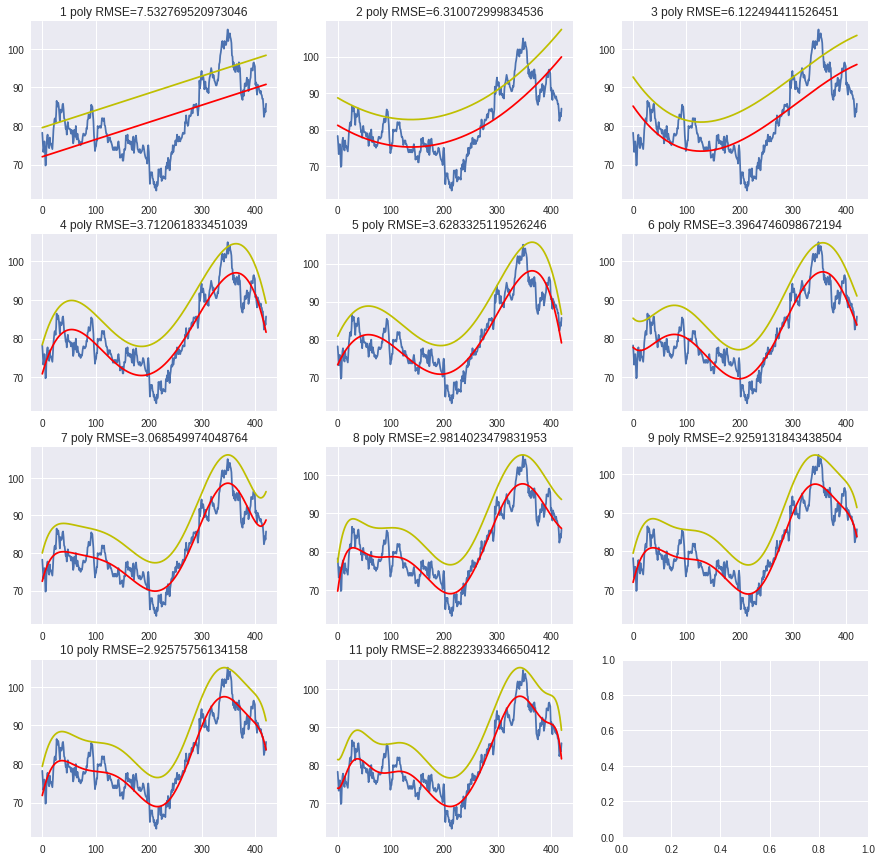

In [119]:
import itertools

_, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes_list = list(itertools.chain.from_iterable(axes))


poly = np.arange(1, 12)

for p_cnt, axis in zip(poly, axes_list):
    p = np.polynomial.Chebyshev.fit(x, y, p_cnt)
    y_fit = p(x)
    rmse = np.sqrt(metrics.mean_squared_error(y, y_fit))
    axis.set_title(f'{p_cnt} poly RMSE={rmse}')
    axis.plot(x, y, '', x, y_fit, 'r', x, y_fit + sklearn_RMSE, 'y')

# 观察下图，到第9次多项式就可以了。估计也是书中为什么只做了9次。见P138

### 2. 使用sklearn做回归

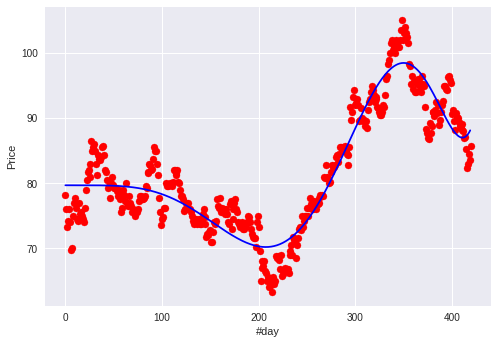

In [120]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

POLY_DEGREE = 9
# 读取数据集
datasets_X = x
datasets_Y = y

length = len(datasets_X)
datasets_X = np.array(datasets_X).reshape([length,1])
datasets_Y = np.array(datasets_Y)
minX = min(datasets_X)
maxX = max(datasets_X)
X = np.arange(minX,maxX).reshape([-1,1])
poly_reg = PolynomialFeatures(degree = POLY_DEGREE)
X_poly = poly_reg.fit_transform(datasets_X)
lin_reg_2 = linear_model.LinearRegression()
lin_reg_2.fit(X_poly, datasets_Y)

# 图像中显示
plt.scatter(datasets_X, datasets_Y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.xlabel('#day')
plt.ylabel('Price')


## 3.插值
见P139